Importing Dataset

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

2023-10-01 19:53:23.723842: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 19:53:23.725197: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 19:53:23.757847: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 19:53:23.759135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 19:53:24.687120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Checking shapes

In [3]:
# mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 6s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

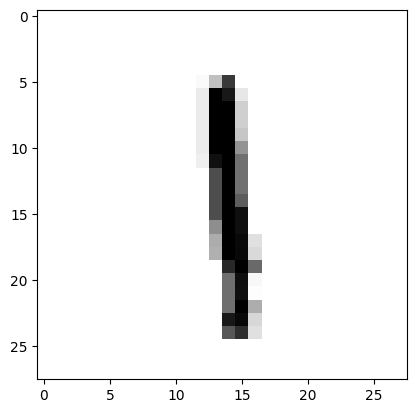

In [4]:
one_image = x_train[0,:,:]
print(one_image)

import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

from PIL import Image
img = Image.fromarray(one_image)
img.show()

In [5]:
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))
x_train.shape

(60000, 784)

In [6]:
y_train.shape

(60000,)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(300, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='sigmoid')
])


2023-10-01 19:54:35.178269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='sgd', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/home/arun/.local/lib/python3.8/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6186 - accuracy: 0.8480
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3291 - accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9302
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2249 - accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2055 - accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1892 - accuracy: 0.9474
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1754 - accuracy: 0.9513
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9542
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1533 - accurac

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9571


[0.15232987701892853, 0.957099974155426]

In [10]:
model.save_weights('model.h5')
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)